<a href="https://colab.research.google.com/github/aseddin/F23_ECE4715/blob/main/1_end_to_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Machine Learning Project

This notebook shows an example machine learning project from start to finish, it will follow the generic project checklist provided below.

## Machine Learning Project Checklist
1. Get the data
2. Look at the data to gain insights
3. Prepare the data for machine learning algorithms
4. Explore different models and select a suitable one
5. Fine-tune your model

In [2]:
# code to set things up

# importing common libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# California Housing Price Prediction Project

The aim of this project is to predict median house values in California districts using various features associated with these districts.

This dataset is derived from the 1990 U.S. census and includes features such as population, median income, house age, among others. The target variable in this dataset is the median house price within a district.

## 1. Get the data

There are many sources for data, the following is a list of some popular open data repositories:
* [OpenML.org](https://www.openml.org/)
* [Kaggle.com](https://www.kaggle.com/datasets)
* [PapersWithCode.com](https://paperswithcode.com/datasets)
* [UCI ML Repository](https://archive.ics.uci.edu/)
* [Amazon's AWS datasets](https://registry.opendata.aws/)
* [TensorFlow Datasets](https://www.tensorflow.org/datasets)

### `sklearn` Dataset loading utilities

`sklearn.datasets` provides 3 kinds of dataset interfaces:
* Loaders: load small standard datasets
* Fetchers: download and load larger datasets
* Generators: generate synthetic datasets

[Click here](https://scikit-learn.org/stable/datasets.html) to read more about these interfaces


### Download the data

You can get this specific dataset using the `fetch_california_housing` function, which is a standard data fetcher included in the `sklearn` library.

In [3]:
from sklearn.datasets import fetch_california_housing   # from a submodule of sklearn, we import a specific function

# fetcher returns a Bunch object, setting as_frame=True sets its data key to Pandas DataFrame
skl_housing = fetch_california_housing(as_frame=True)

In [4]:
type(skl_housing)   # Bunch is a subclass of dict

sklearn.utils._bunch.Bunch

In [5]:
skl_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(skl_housing.DESCR) # look at this in more detail later

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
skl_housing.data    # this returns a DataFrame b/c we set as_frame=True

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
skl_housing.feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

**Target**: Median house value for California districtscts expressed in hundreds of thousands of dollars ($100,000).

In [9]:
skl_housing.target  # this is a Series, which is a 1D DataFrame

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

The default dataset consists solely of numerical attributes without any missing data. To achieve a more comprehensive analysis, we will work with a modified version that includes categorical features and incorporates some missing data.

This will download as a tgz file, which you can extract using the `tar` command.

But now we have ocean_proximity as a categorical feature, and we have missing values in total_bedrooms.

Also, there is missing data in the total_bedrooms column. We will need to handle this missing data before we can proceed with the analysis.

In [10]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## 2. Look at the data to gain insights

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* The `total_bedrooms` feature is missing 20640 - 20433 = 207 values
* The `ocean_proximity` is not numeric


In [12]:
housing.head()  # head is used to display the first 5 rows of the dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing["ocean_proximity"].value_counts()   # value_counts is used to display the count of unique values in the column

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
housing.describe()  # describe is used to display the statistical summary of the dataframe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


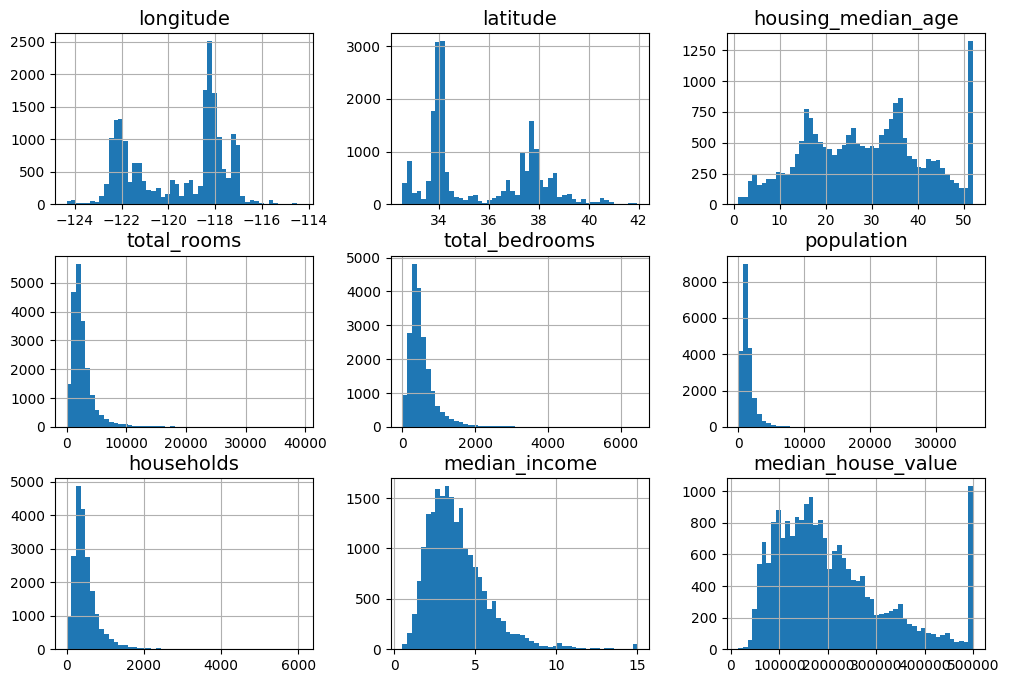

In [15]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()


In [16]:
# Calculate the median of total_bedrooms
median_total_bedrooms = housing["total_bedrooms"].median()
print(f"Median of total_bedrooms: {median_total_bedrooms}")

# Calculate the mean of total_bedrooms
mean_total_bedrooms = housing["total_bedrooms"].mean()
print(f"Mean of total_bedrooms: {mean_total_bedrooms}")

Median of total_bedrooms: 435.0
Mean of total_bedrooms: 537.8705525375618


**Comments**

* Median income is not expressed in USD. roughtly tens of thousands. Is is also scaled and capped at 15.0001. Capped means that the values equal to 15.0001 actually represent all the values above 15.0001. Hence, the peak at the far right side. 
* Median age and median house value are both capped. Hence, the peak at the far right side. 
* The features have different scales


**CREATE A TEST SET BEFORE YOU CONTINUE!**

You can suffle the dataset then split it based on an index. However, `sklearn` provides a few functions that makes the task easier and more robust.

In [17]:
from sklearn.model_selection import train_test_split    # submodule of sklearn called model_selection, it contains a function called train_test_split

# train_test_split splits the data into two sets, one for training and one for testing and shuffles the data before splitting.
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) 

We set a seed so that the model won't be tested on seen data.

In [18]:
type(train_set)

pandas.core.frame.DataFrame

In [19]:
housing.shape

(20640, 10)

In [20]:
train_set.shape

(16512, 10)

In [21]:
test_set.shape

(4128, 10)

In [22]:
# make a copy of the training set to revert to when necessary b/c we will be modifying the training set.
housing = train_set.copy()

In [23]:
type(housing)

pandas.core.frame.DataFrame

### Visualizing Geographical Data

The dataset contains geographical information, specifically latitude and longitude data, which can be harnessed to generate visual representations of geographic data.

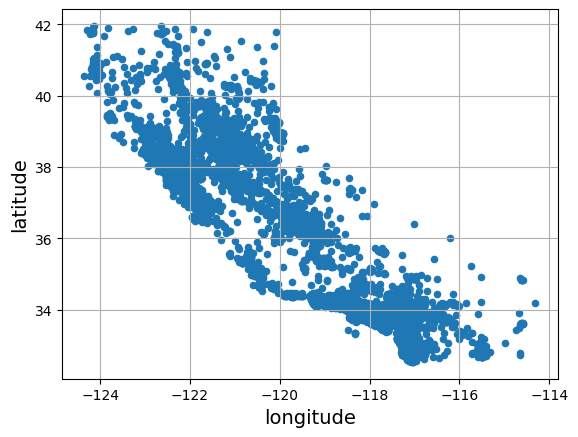

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

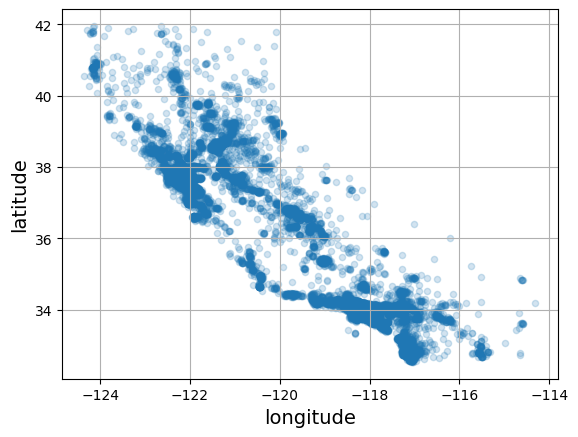

In [25]:
# to see the district density we add alpha
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
               alpha=0.2)   # alpha: transparency; we want this b/c we want to see the density of the points
plt.show()

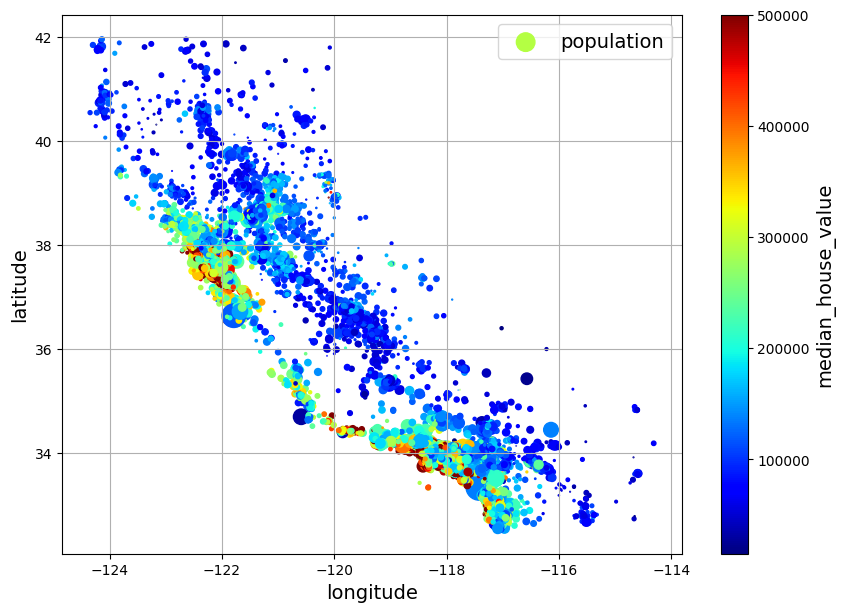

In [26]:
# option s: radius of each circle represent the district's population (size)
# option c: color represent price (low=blue, rid=high)  (color)
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
               s=housing["population"] / 100, label="population",
               c="median_house_value", cmap="jet", colorbar=True,
               legend=True, figsize=(10, 7))
plt.show()

It seems that housing price is related to the location and population density (Duh!)

### Correlations

Let's compute the Pearson's correlation coefficient between every pair of numerical features

- **Pearson's Correlation Coefficient**: Measures the linear relationship between two numerical features.
  - **Range**: Values range from -1 to 1.
    - **-1**: Perfect negative linear correlation.
    - **0**: No linear correlation.
    - **1**: Perfect positive linear correlation.
  - **Importance**: Helps identify which features are most relevant to the target variable.
    - **Positive Correlation**: As one feature increases, the other tends to increase.
    - **Negative Correlation**: As one feature increases, the other tends to decrease.
  - **Usage**: Used to understand the strength and direction of the relationship between features.
    - **Feature Selection**: Identify features that are strongly correlated with the target variable.
    - **Multicollinearity**: Detect features that are highly correlated with each other, which can affect model performance.

- **Computing Pearson's Correlation**:
  - **Formula**: \( r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} \)
    - \( x_i \) and \( y_i \): Individual data points.
    - \( \bar{x} \) and \( \bar{y} \): Means of the data points.
  - **Implementation**: Use `corr()` method in Pandas to compute the correlation matrix.

- **Visualizing Correlations**:
  - **Heatmap**: Visual representation of the correlation matrix.
  - **Scatter Plot Matrix**: Pairwise scatter plots to visualize relationships between features.

- **Interpreting Results**:
  - **High Correlation**: Strong linear relationship.
  - **Low Correlation**: Weak or no linear relationship.
  - **Action**: Use high-correlation features for model training and feature selection.

In [27]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:

numeric_attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']

## Compute the correlation matrix
corr_matrix = housing[numeric_attributes].corr()

In [29]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924341,-0.110786,0.043100,0.069439,0.100706,0.056318,-0.014592,-0.043603
latitude,-0.924341,1.000000,0.012640,-0.036327,-0.069283,-0.110514,-0.073915,-0.079259,-0.146324
housing_median_age,-0.110786,0.012640,1.000000,-0.362433,-0.318544,-0.291842,-0.301198,-0.118410,0.104714
total_rooms,0.043100,-0.036327,-0.362433,1.000000,0.928199,0.851766,0.916265,0.197326,0.134060
total_bedrooms,0.069439,-0.069283,-0.318544,0.928199,1.000000,0.873484,0.979627,-0.011782,0.049993
population,0.100706,-0.110514,-0.291842,0.851766,0.873484,1.000000,0.903045,0.000883,-0.025820
households,0.056318,-0.073915,-0.301198,0.916265,0.979627,0.903045,1.000000,0.009366,0.065798
median_income,-0.014592,-0.079259,-0.118410,0.197326,-0.011782,0.000883,0.009366,1.000000,0.687013
median_house_value,-0.043603,-0.146324,0.104714,0.134060,0.049993,-0.025820,0.065798,0.687013,1.000000




**Output: `corr_matrix`**

The output `corr_matrix` is a DataFrame that looks something like this:

```
               longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
longitude       1.000000  -0.043603            0.015043      0.022195       0.015642     -0.025820    -0.022195      0.022195           -0.043603
latitude       -0.043603   1.000000           -0.146324     -0.015642      -0.015043      0.025820     0.015642     -0.015642           -0.146324
housing_median_age  0.015043  -0.146324            1.000000      0.134060       0.049993     -0.025820     0.065798      0.104714            0.104714
total_rooms      0.022195  -0.015642            0.134060      1.000000       0.677998     -0.025820     0.727186      0.134060            0.134060
total_bedrooms   0.015642  -0.015043            0.049993      0.677998       1.000000     -0.025820     0.727186      0.049993            0.049993
population      -0.025820   0.025820           -0.025820     -0.025820      -0.025820      1.000000    -0.025820     -0.025820            -0.025820
households      -0.022195   0.015642            0.065798      0.727186       0.727186     -0.025820     1.000000      0.065798            0.065798
median_income    0.022195  -0.015642            0.104714      0.134060       0.049993     -0.025820     0.065798      1.000000            0.687013
median_house_value -0.043603  -0.146324            0.104714      0.134060       0.049993     -0.025820     0.065798      0.687013            1.000000
```

**Interpretation**

- **Diagonal Elements**: Each diagonal element (e.g., `longitude` with `longitude`) is 1.0, indicating perfect correlation with itself.
- **Off-Diagonal Elements**: Each off-diagonal element (e.g., `longitude` with `latitude`) represents the correlation coefficient between the two features.
  - **Positive Values**: Indicate a positive correlation (e.g., `total_rooms` and `total_bedrooms` have a correlation of 0.677998).
  - **Negative Values**: Indicate a negative correlation (e.g., `longitude` and `latitude` have a correlation of -0.043603).
  - **Values Close to Zero**: Indicate little to no linear correlation (e.g., `population` and `households` have a correlation of -0.025820).

**Key Takeaways**

- **Feature Relationships**: The correlation matrix helps you understand how each feature relates to every other feature.
- **Target Variable**: By examining the correlations with `median_house_value`, you can identify which features are most relevant to predicting house prices.
- **Multicollinearity**: High correlations between features (e.g., `total_rooms` and `total_bedrooms`) can indicate multicollinearity, which might affect model performance.

**Actionable Insights**

- **Feature Selection**: Focus on features with high correlations to `median_house_value` (e.g., `median_income`).
- **Feature Engineering**: Consider creating new features that capture complex relationships between existing features.
- **Model Building**: Use the correlation matrix to guide feature selection and preprocessing steps in your machine learning model.

By analyzing the correlation matrix, you gain valuable insights into the relationships between features, which can inform your data preprocessing and model building steps.

Let's look at how each feature correlate with the target (median house value)

In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

**Correlation of Features with Median House Value**

Given the correlation coefficients between each feature and the `median_house_value`, we can interpret the relationships as follows:

- **Positive Correlation**:
  - **median_income**: 0.687013
    - **Interpretation**: As median income increases, the median house value tends to increase.
    - **Importance**: This is a strong positive correlation, indicating that income is a significant factor in determining house prices.

- **Moderate Positive Correlation**:
  - **total_rooms**: 0.134060
    - **Interpretation**: As the number of total rooms increases, the median house value tends to increase slightly.
    - **Importance**: This feature might be useful but not as strongly correlated as median income.

  - **housing_median_age**: 0.104714
    - **Interpretation**: As the median age of housing increases, the median house value tends to increase slightly.
    - **Importance**: This feature might be useful but not as strongly correlated as median income.

  - **households**: 0.065798
    - **Interpretation**: As the number of households increases, the median house value tends to increase slightly.
    - **Importance**: This feature might be useful but not as strongly correlated as median income.

  - **total_bedrooms**: 0.049993
    - **Interpretation**: As the number of total bedrooms increases, the median house value tends to increase slightly.
    - **Importance**: This feature might be useful but not as strongly correlated as median income.

- **Negative Correlation**:
  - **population**: -0.025820
    - **Interpretation**: As population increases, the median house value tends to decrease slightly.
    - **Importance**: This feature might be useful but not as strongly correlated as median income.

  - **longitude**: -0.043603
    - **Interpretation**: As longitude increases (moving eastward), the median house value tends to decrease slightly.
    - **Importance**: This feature might be useful but not as strongly correlated as median income.

  - **latitude**: -0.146324
    - **Interpretation**: As latitude increases (moving northward), the median house value tends to decrease slightly.
    - **Importance**: This feature might be useful but not as strongly correlated as median income.



**Actionable Insights**

- **Feature Selection**: Focus on `median_income` as the primary feature for predicting `median_house_value`.
- **Additional Features**: Consider using `total_rooms`, `housing_median_age`, `households`, and `total_bedrooms` as additional features, but be aware that their correlations are not as strong.
- **Geographical Features**: `longitude` and `latitude` might still be useful, especially if combined with other features to capture geographical trends.
- **Population**: While it has a weak negative correlation, it might still be useful in combination with other features.

By understanding these correlations, you can make informed decisions about which features to include in your machine learning model and how to preprocess them for optimal performance.

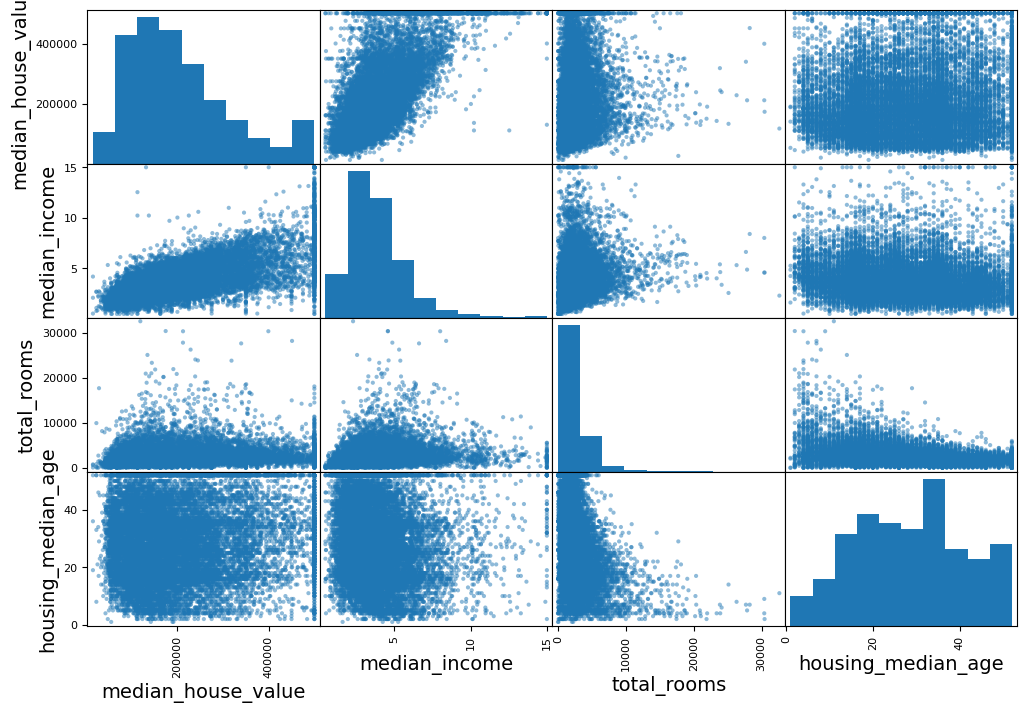

In [31]:
from pandas.plotting import scatter_matrix

# there are too many attributes to plot, we select key attributes (the ones most correlated with the median house values)
select_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[select_attributes], figsize=(12, 8))
plt.show() 

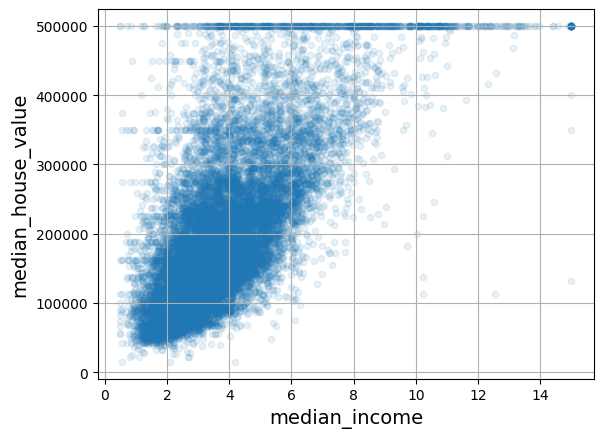

In [32]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

### Atribute Combinations

In [33]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [34]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
rooms_per_house       0.146940
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
people_per_house     -0.021577
population           -0.025820
longitude            -0.043603
latitude             -0.146324
bedrooms_ratio       -0.254817
Name: median_house_value, dtype: float64

## 3. Prepare the data for machine learning algorithms

This step should be function-based since it allows for reproducibility with an updated dataset or even the test set.

In [35]:
# revert to a clean version of the training set
housing = train_set.copy()

# separate the attributes from the label
X_train = housing.drop("median_house_value", axis=1) # drop creates a copy of housing without specific feature(s)
y_train = housing["median_house_value"].copy()

The features (X_train) are the input variables that the mode will use to make predictions, while the label (y_train) is the output variable that the model will predict.

`median_house_value` has been dropped from X_train. If we included the target variable (`median_house_value`) in the features, the model could learn to simply "cheat" by using the target variable to make predictions. This is known as data leakage and can lead to overfitting. 

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [37]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 14196 to 15795
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


### Dealing with missing data

Machine learning algorithms do not work well with missing data. There are several approaches to address this issue:
1. Delete samples with missing data (i.e. remove the corresponding housing district)
2. Delete attributes with missing data (i.e. delete the `total_bedrooms` feature)
3. Set all missing values to a specific value (i.e. zero, feature mean, feature median...etc.) (Also known as _imputation_)

`Pandas` can be used to implement these approaches

In [38]:
# find the samples with missing data

null_rows_idx = X_train.isnull().any(axis=1)    # We take the dataframe and check if there is any missing data in each row
X_train.loc[null_rows_idx].head()               # loc will return the rows with missing data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,<1H OCEAN


In [39]:
# Delete samples with missing data
X_train_option1 = X_train.copy()

X_train_option1.dropna(subset=["total_bedrooms"], # dropna will delete the rows with missing data in the "total_bedrooms" column,
                       inplace=True)              # inplace=True will modify the original dataframe directly without creating a new one

X_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [40]:
# Delete attributes with missing data
X_train_option2 = X_train.copy()

# Drop the "total_bedrooms" column from the DataFrame, modifying the original DataFrame directly
X_train_option2.drop("total_bedrooms", axis=1, inplace=True)

# Display the rows where there were originally missing values to verify the column deletion
X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,191.0,67.0,1.3897,<1H OCEAN


In [41]:
# Impute the missing values (i.e., with the median)
X_train_option3 = X_train.copy()

# Calculate the median of the "total_bedrooms" column of the DataFrame
median = X_train_option3["total_bedrooms"].median() # median() is a method of the pandas Series object

# Fill missing values in the "total_bedrooms" column with the calculated median, modifying the DataFrame in place
X_train_option3["total_bedrooms"].fillna(median, inplace=True)

# Display the rows where there were originally missing values to verify the imputation
X_train_option3[null_rows_idx].head()

/var/folders/d_/bbmbtkjx5bldzz_9b7565vyh0000gn/T/ipykernel_39963/2431670186.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_option3["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,437.0,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,437.0,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,437.0,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,437.0,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,437.0,191.0,67.0,1.3897,<1H OCEAN


Option 3 is likely the least destructive as it preserves the original data. Nevertheless, it's advisable to employ `sklearn`'s `SimpleImputer` class rather than `Pandas`. This approach will enable us to retain the imputation value, making it applicable to other datasets, such as the test set or any new data introduced to the model.

Why Use `SimpleImputer` from `sklearn`?

- **Consistency**: `SimpleImputer` ensures that the imputation strategy (e.g., median, mean) is applied consistently across different datasets.
- **Reusability**: The imputer can be fitted on the training set and then applied to the test set or any new data, ensuring that the same imputation values are used.
- **Integration**: `SimpleImputer` integrates seamlessly with `sklearn` pipelines, allowing for a streamlined workflow that includes data preprocessing, model training, and evaluation.
- **Scalability**: `SimpleImputer` is designed to handle large datasets efficiently, making it suitable for real-world applications.
- **Flexibility**: `SimpleImputer` supports various imputation strategies (e.g., median, mean, most frequent), providing flexibility in handling missing data.

By using `SimpleImputer`, we ensure that the imputation process is robust, reproducible, and scalable, which is crucial for building reliable machine learning models.


In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  # initialize the imputer with the median strategy

# other strategies are available (i.e. mean, most_frequent, constant...etc.)

As the median is only applicable to numerical features (i.e., it cannot be used on categorical features), we should separate the numerical features.

In [43]:
# Drop the categorical feature 'ocean_proximity' and select only numerical features
X_train_num = X_train.select_dtypes(include=[np.number])    # np.number represents all numerical data types in NumPy

# [np.number] is in brackets [] because select_dtypes() expects a list of data types to include or exclude.


#### Estimator (`fit()`)

- **Purpose**: The `fit()` method trains a model by adjusting its internal parameters based on the input data (features) and target values (labels).
- **Input**: It takes two main arguments:
  - `X`: The feature matrix (independent variables) of shape `(n_samples, n_features)`.
  - `y`: The target vector (dependent variable) of shape `(n_samples,)` for supervised learning. For unsupervised learning, `y` is not required.
- **Process**: During training, the model learns patterns or relationships in the data:
  - For supervised models (e.g., LinearRegression, DecisionTreeClassifier), it learns to map features to the target.
  - For unsupervised models (e.g., KMeans, PCA), it learns the structure or distribution of the data.
- **Output**: The method returns the trained model instance, allowing for method chaining (e.g., `model.fit(X, y).predict(X)`).
- **Key Notes**:
  - The model must be initialized (e.g., `model = LinearRegression()`) before calling `fit()`.
  - After training, the model can make predictions using `predict()` or transform data using `transform()`.
  - The `fit()` method does not return predictions; it only trains the model.



##### Before `fit()`:
- **Data**: Imagine a dataset where `X` represents features like `[age, income]` and `y` represents a target like `[credit_score]`.
  - `X` (features): 
    ```
    [[25, 50000],
     [30, 60000],
     [35, 70000]]
    ```
  - `y` (target): 
    ```
    [650, 700, 750]
    ```
- **Model State**: The model's parameters are uninitialized or set to default values. It has no knowledge of the relationship between `age`, `income`, and `credit_score`.

##### After `fit()`:
- **Model State**: The model has learned the relationship between the features (`age`, `income`) and the target (`credit_score`). For example:
  - In a linear regression model, it might have learned coefficients like `[10, 0.5]`, meaning `credit_score = 10 * age + 0.5 * income + intercept`.
  - In a decision tree, it might have learned rules like "if age > 30 and income > 60000, predict credit_score = 750".
- **Data**: The input data remains unchanged, but the model now has the ability to predict or transform new data based on the learned patterns.

##### Summary:
- Before `fit()`, the model is like a blank slate with no understanding of the data.
- After `fit()`, the model has learned the underlying patterns and can now make predictions or transform data based on those patterns.

In [44]:
# Fit the imputer to the numerical training data to learn the imputation strategy
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

**Note**: In `sklearn`, hyperparameters are directly accessible as public attributes, and learned parameters are also accessible directly as public attributes, with learned parameters typically having an underscore `_` as a suffix.

**Note**: Hyperparameters are configuration settings that are set before the learning process begins. They control the behavior of the model and are not learned from the data. Examples include the learning rate in gradient descent, the number of trees in a random forest, and the strategy for imputing missing values in `SimpleImputer`.

**Commonly Used Attributes in `SimpleImputer` Class**

- **Hyperparameters**:
  - **`strategy`**: Specifies the imputation strategy to use. Common values include 'mean', 'median', 'most_frequent', and 'constant'.
  - **`missing_values`**: Specifies the placeholder for missing values. Default is `np.nan`.
  - **`fill_value`**: When `strategy='constant'`, this specifies the constant value to use for imputation.
  - **`add_indicator`**: If `True`, adds a binary indicator column that is 1 where the data was missing and 0 otherwise.
  - > **Note**: These parameters are a part of the `SimpleImputer` class and are set during initialization (e.g., `SimpleImputer(strategy='mean')`).

- **Learned Parameters**:
  - **`statistics_`**: Stores the imputation values (e.g., medians, means) computed for each feature.
  - **`feature_names_in_`**: Stores the names of the features (columns) that were used to fit the imputer.
  - **`n_features_in_`**: Stores the number of features seen during `fit`.
  - > **Note**: These attributes are set after calling the `fit` method.


In [45]:
# hyperparameter
imputer.strategy

'median'

In [46]:
# imputer computed the medians of all features (missing or not)
imputer.statistics_ #learned parameter

# .statistics_ is from the SimpleImputer class from the sklearn library

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  437.    , 1169.    ,
        411.    ,    3.5246])

In [47]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [48]:
# double check the result using Pandas' median function
X_train_num.median()

longitude             -118.4900
latitude                34.2500
housing_median_age      29.0000
total_rooms           2129.0000
total_bedrooms         437.0000
population            1169.0000
households             411.0000
median_income            3.5246
dtype: float64

#### Transformer (`transform()`)
- **Purpose**: The `transform()` method applies the learned transformations to the input data.
- **Input**: It takes the feature matrix `X` of shape `(n_samples, n_features)` as input.
- **Process**: The method applies the learned transformations (e.g., imputation, scaling) to the input data.
- **Output**: It returns the transformed data, which can be a new feature matrix or a modified version of the original feature matrix.
- **Usage**: The transformed data is then used for further processing, such as model training or evaluation.

In [49]:
# Use the imputer to fill the missing data in the numerical dataset
# transform() is a method of the SimpleImputer class that applies the learned imputation strategy to the numerical dataset (median in this case)
X_train_num_imputed = imputer.transform(X_train_num)

In [50]:
type(X_train_num_imputed)

numpy.ndarray

`SimpleImputer` returns a numpy array. We can convert it back to a Pandas DataFrame

In [51]:
X_train_num_imputed_df = pd.DataFrame(X_train_num_imputed, columns=X_train_num.columns, index=X_train_num.index)

In [52]:
# Display the first few rows of the imputed numerical dataset where there were originally missing values
X_train_num_imputed_df.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9529,-118.31,33.94,40.0,1550.0,437.0,798.0,270.0,3.7750
16519,-117.86,34.01,16.0,4632.0,437.0,3038.0,727.0,5.1762
19782,-119.75,34.45,6.0,2864.0,437.0,1404.0,603.0,5.5073
1343,-120.32,37.29,38.0,576.0,437.0,478.0,112.0,2.3382
9827,-121.85,36.61,38.0,238.0,437.0,191.0,67.0,1.3897


### Handling text and categorical attributes

Machine learning algorithms are generally designed to operate with numerical features, necessitating the conversion of textual or categorical data into numerical representations.

There are multiple approaches to address categorical attributes, and we will examine two of them.

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


`ocean_proximity` is a categorical attributes

In [54]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND


The issue with having integers associated with the text categories in the `ocean_proximity` feature is primarily related to the interpretation of these numerical values by machine learning algorithms. Here are the key problems and considerations:

##### Problems with Integer Encoding of Text Categories

1. **Lack of Meaningful Order**:
   - The integers assigned to the categories (e.g., 0, 1, 2, 3, 4) do not inherently convey any meaningful order or relationship between the categories. For example, the category "INLAND" might be assigned the integer 1, while "NEAR OCEAN" might be assigned the integer 2. This ordering does not reflect any natural or meaningful relationship between these categories.

2. **Artificial Relationships**:
   - Machine learning algorithms might incorrectly infer relationships between the categories based on their numerical values. For instance, a model might assume that "NEAR OCEAN" (2) is more similar to "INLAND" (1) than to "ISLAND" (4), which is not true.

3. **Misleading Interpretations**:
   - The numerical values can lead to misleading interpretations, especially if the categories do not have a natural order. For example, a linear model might treat the categories as if they are on a continuous scale, which is not appropriate.

4. **Scalability Issues**:
   - If the number of categories is large, assigning unique integers to each category can lead to a high-dimensional feature space, which can slow down training and potentially degrade performance.

##### Solutions

To address these issues, you can use alternative encoding techniques that better capture the nature of the categorical data:

1. **One-Hot Encoding**:
   - One-Hot Encoding transforms each category into a binary vector, where each unique category is represented by a binary vector. This approach does not impose any artificial order on the categories and is suitable for both ordered and unordered categories.

2. **Target Encoding**:
   - Target Encoding replaces each category with the mean (or another statistic) of the target variable for that category. This approach can capture the relationship between the categories and the target variable, but it requires careful handling to avoid data leakage.

3. **Embedding Layers**:
   - For deep learning models, embedding layers can be used to learn continuous representations of categorical variables. This approach allows the model to learn meaningful embeddings for the categories based on the data.




In [55]:
X_train_cat.value_counts()

ocean_proximity
<1H OCEAN          7313
INLAND             5276
NEAR OCEAN         2091
NEAR BAY           1827
ISLAND                5
Name: count, dtype: int64

#### Ordinal Encoding



Ordinal encoding is a technique used to convert categorical data into numerical data by assigning a unique integer to each category. This method is particularly useful when the categories have a natural ordering or ranking.

##### What `OrdinalEncoder()` Does:

- **Assigns Integers**: Each unique category in the dataset is assigned a unique integer.
- **Preserves Order**: If the categories have a natural order, this order is preserved in the encoded values.
- **Handles Missing Values**: Can handle missing values by either raising an error or using a specified strategy.

##### What `fit_transform()` Does:

- **Combines Fit and Transform**: Learns the unique categories in the training data and assigns them integers.
- **Fits the Encoder**: Learns the unique categories in the training data and assigns them integers.
- **Transforms the Data**: Applies the learned encoding to the training data, converting it from categorical to numerical format.
- **Returns Encoded Data**: The output is a NumPy array with the encoded values.

##### `What np.unique()` Does:
- Identifies Unique Values: Returns the unique elements of an array.
- Counts Occurrences: Optionally, returns the counts of each unique element.
- Sorts Values: By default, the unique values are sorted.

##### Key Points:

- **Preserves Order**: If the categories have a natural order, this order is preserved in the encoded values.
- **Handles Missing Values**: Can handle missing values by either raising an error or using a specified strategy.
- **Efficiency**: Efficient for datasets with a small number of unique categories.
- **Limitations**: Not suitable for categories without a natural order, as it may introduce artificial relationships between categories.

By using `OrdinalEncoder`, you can effectively convert categorical data into numerical data, making it suitable for machine learning algorithms that require numerical input.



##### Implementation of Ordinal Encoding: 

In [56]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()  # Create an instance of OrdinalEncoder
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)    # accepts pandas dataframe input and returns numpy array output

In [57]:
X_train_cat_encoded

array([[4.],
       [4.],
       [3.],
       ...,
       [1.],
       [1.],
       [0.]], shape=(16512, 1))

In [58]:
np.unique(X_train_cat_encoded, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([7313, 5276,    5, 1827, 2091]))

In [59]:
ordinal_encoder.categories_ # returns the learned categories for each feature

# Note that the output is alphabetically ordered, which is not the case for the original data

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In cases where the feature represent unordered categories, as is the case in this dataset, the numerical values do not necessarily correspond to the concept of similarity. In other words, categories 0 and 1 may not inherently imply similarity. With this type of encoding, certain machine learning algorithms might mistakenly infer similarity based solely on the numerical category values.

There are some categorical features (i.e. excellent, good, average, bad) where ordered encoding is OK and ordinal encoding is appropriate.

#### One Hot Encoding

One hot encoding is a technique used to convert categorical data into a numerical format that can be provided to machine learning algorithms to do a better job in prediction. It transforms each categorical attribute into a set of binary features, where each unique category is represented by a binary vector.

##### What `OneHotEncoder()` Does:

- **Creates Binary Vectors**: Each unique category in the dataset is represented by a binary vector.
  - **Binary Vector**: A vector where each element is either 0 or 1.
  - **Why Represent as Binary Vector?**: Binary vectors are used to represent categorical data in a way that machine learning algorithms can understand. Each category is uniquely identified by a specific pattern of 0s and 1s.
  - **Marks the Category**: One of the new features will be marked as '1', and the others will be set to '0', depending on the specific category it represents.
    - **Representation as 1 or 0**: In a binary vector, a '1' indicates the presence of a specific category, while '0' indicates its absence. This binary representation helps in distinguishing between different categories.
- **Handles Missing Values**: Can handle missing values by either raising an error or using a specified strategy.
- **Sparse Output**: By default, the output is a sparse matrix to save memory, but it can be converted to a dense array if needed.

##### What `fit_transform()` Does:

- **Fits the Encoder**: Learns the unique categories in the training data and assigns them binary vectors.
- **Transforms the Data**: Applies the learned encoding to the training data, converting it from categorical to numerical format.
- **Returns Encoded Data**: The output is a sparse matrix with the encoded values.

##### What `toarray()` Does:

- **Converts Sparse Matrix to Dense Array**: Converts the sparse matrix returned by `fit_transform()` into a dense NumPy array.
- **Explicit Representation**: Provides an explicit representation of the encoded data, which can be easier to read and manipulate.

##### Key Points:

- **Binary Vectors**: Each unique category is represented by a binary vector.
  - **Binary Vector**: A vector where each element is either 0 or 1.
  - **Why Represent as Binary Vector?**: Binary vectors are used to represent categorical data in a way that machine learning algorithms can understand. Each category is uniquely identified by a specific pattern of 0s and 1s.
  - **Marks the Category**: One of the new features will be marked as '1', and the others will be set to '0', depending on the specific category it represents.
    - **Representation as 1 or 0**: In a binary vector, a '1' indicates the presence of a specific category, while '0' indicates its absence. This binary representation helps in distinguishing between different categories.
- **Handles Missing Values**: Can handle missing values by either raising an error or using a specified strategy.
- **Sparse Output**: By default, the output is a sparse matrix to save memory, but it can be converted to a dense array if needed.
- **Efficiency**: Efficient for datasets with a large number of unique categories.
- **Limitations**: Can lead to a large number of features, which can increase the dimensionality of the dataset and potentially slow down the training process.

By using `OneHotEncoder`, you can effectively convert categorical data into numerical data, making it suitable for machine learning algorithms that require numerical input. The `fit_transform()` method learns the unique categories in the training data and applies the learned encoding to the data, while `toarray()` converts the sparse matrix into a dense array for easier manipulation.


##### Implementation of One Hot Encoding:

In [60]:
from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder()
X_train_cat_1hot = hot_encoder.fit_transform(X_train_cat)

In [61]:
X_train_cat_1hot
# Sparse means that it is not a dense matrix, but a matrix with many zeros.
# Sparse matrices tells us what the ones are, and the rest are zeros.
# Sparise matrices are more memory efficient b/c they only store the non-zero values.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [62]:
X_train_cat_1hot.toarray()  # outputs the binary matrix as a dense numpy array

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(16512, 5))

In [63]:
# you can force the OneHotEncoder to return a dense numpy array
hot_encoder = OneHotEncoder(sparse_output=False)    # setting sparse_output=False will return a dense numpy array
X_train_cat_1hot = hot_encoder.fit_transform(X_train_cat)
X_train_cat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(16512, 5))

When employing a `DataFrame` as input for `sklearn` estimators, the column names are preserved within `feature_names_in_`. These names are retained for future comparisons with subsequent `DataFrame` inputs, such as those encountered during the use of `transform()` or `predict()`. Additionally, they can be utilized to facilitate the reconstruction of another `DataFrame`.

In [64]:
hot_encoder.feature_names_in_   # an underscore at the end means that its a learned attribute that learned from the data you fed it

array(['ocean_proximity'], dtype=object)

In [65]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [66]:
# transformers can generate new names from the categories to build another DataFrame
hot_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [67]:
# Convert the 1-hot encoded array back to a DataFrame
X_train_cat_1hot_df = pd.DataFrame(X_train_cat_1hot,
                     columns=hot_encoder.get_feature_names_out(),
                     index=X_train_cat.index)

X_train_cat_1hot_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,0.0,0.0,0.0,0.0,1.0
8267,0.0,0.0,0.0,0.0,1.0
17445,0.0,0.0,0.0,1.0,0.0
14265,1.0,0.0,0.0,0.0,0.0
2271,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
11284,0.0,0.0,0.0,1.0,0.0
11964,1.0,0.0,0.0,0.0,0.0
5390,0.0,1.0,0.0,0.0,0.0
860,0.0,1.0,0.0,0.0,0.0


### Feature Scaling

- **Importance**: Machine learning algorithms perform optimally when input features are on the same scale.
- **Purpose**: Feature scaling aligns all features to the same scale, ensuring that no single feature dominates the model due to its larger numerical values.
- **Impact of Unscaled Features**: Failing to scale features can result in models showing a bias towards features with larger numerical values.
- **Benefits**:
  - **Improved Model Performance**: Ensures that all features contribute equally to the model.
  - **Convergence Speed**: Helps in faster convergence of optimization algorithms.
  - **Numerical Stability**: Improves numerical stability and prevents overflow/underflow issues.
- **Common Scalers**:
  - **MinMaxScaler**: Scales features to a specified range (default is [0, 1]).
  - **StandardScaler**: Standardizes features to have a mean of 0 and a standard deviation of 1.
- **Considerations**:
  - **Data Distribution**: Different scaling techniques are suitable for different data distributions.
  - **Algorithm Requirements**: Some algorithms require specific scaling techniques to perform optimally.
  - **Outliers**: Scaling techniques should be chosen carefully to handle outliers effectively.
- **Potential Pitfalls**:
  - **Outliers**: Outliers can significantly affect the scaling process, especially with methods like MinMaxScaler, which can compress the majority of the data into a small range.
  - **Data Leakage**: Scaling should be applied after splitting the data into training and test sets to avoid data leakage. Scaling the entire dataset before splitting can lead to overly optimistic performance estimates.
  - **Incorrect Scaling Choice**: Choosing the wrong scaling method for the data distribution or algorithm can degrade model performance. For example, StandardScaler assumes a Gaussian distribution, which may not be suitable for all datasets.
  - **Overfitting**: Over-reliance on scaling without addressing underlying data issues (e.g., missing values, noise) can lead to overfitting.

By scaling features, you ensure that all features contribute equally to the model, leading to improved performance, faster convergence, and numerical stability. However, it is crucial to be aware of potential pitfalls and handle them appropriately.

ML algorithms do not like different scales.

To understand how the data looks before and after the `fit_transform` process, let's walk through an example using the `MinMaxScaler`. We'll look at a small subset of the data to see the changes clearly.

#### Before `fit_transform`

Let's assume we have a small subset of the numerical features from the housing dataset:

```python
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {
    'total_rooms': [3000, 2500, 3500, 4000],
    'total_bedrooms': [1000, 900, 1100, 1200],
    'population': [1500, 1300, 1700, 1800],
    'households': [500, 450, 600, 650],
    'median_income': [3.5, 2.8, 4.2, 4.8]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the original data
print("Original Data:")
print(df)
```

##### Output:

```
Original Data:
   total_rooms  total_bedrooms  population  households  median_income
0         3000            1000        1500         500           3.5
1         2500             900        1300         450           2.8
2         3500            1100        1700         600           4.2
3         4000            1200        1800         650           4.8
```

#### After `fit_transform`

Now, let's apply the `MinMaxScaler` to this data:

```python
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler to the data and transform it
scaled_data = min_max_scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the scaled data
print("\nScaled Data:")
print(scaled_df)
```

##### Output:

```
Scaled Data:
   total_rooms  total_bedrooms  population  households  median_income
0      0.000000       -0.500000    -0.500000    -0.500000      0.000000
1     -1.000000       -1.000000    -1.000000    -1.000000     -1.000000
2      1.000000        0.500000     0.500000     0.500000      1.000000
3      0.500000        1.000000     1.000000     1.000000      0.500000
```

##### Explanation:

- **Original Data**: The original data has features with different scales and ranges.
- **Scaled Data**: The scaled data has features transformed to a range of `[-1, 1]`.
  - **Min-Max Scaling**: The formula $ x_{scaled} = \frac{x - \min}{\max - \min} $ is applied to each feature.
  - **Feature Range**: The `feature_range` parameter specifies the desired range for the scaled features.

##### Key Points:

- **Scaling**: The `fit_transform` method scales the features to the specified range.
- **Consistency**: The scaling is consistent across all features, ensuring that no single feature dominates the model.
- **Improved Performance**: Scaling improves the performance of many machine learning algorithms by ensuring that all features contribute equally.

By comparing the original and scaled data, you can see how the `fit_transform` method transforms the data to a consistent scale, which is crucial for many machine learning algorithms.

#### Min-Max scaling (Normalization)

A linear transformation that scales each of the input features to the range $[0, 1]$

$$
x_{scaled} = \frac{x - min}{max-min}
$$

* $x$ is the unscaled input feature
* $min$ is the minimum value of $x$ (typically from the training set)
* $max$ is the maximum value of $x$ (typically from the training set)
* $x_{scaled}$ is the scaled feature (a number between 0 and 1)

The equation above can be modified slightly to accomodate ranges other than $[0, 1]$

In [68]:
from sklearn.preprocessing import MinMaxScaler

# default range is [0, 1]; feature_range changes it
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))    # MinMaxScaler will learn the min and max from the training set (we feed it a hyperparameter)
X_train_num_min_max_scaled = min_max_scaler.fit_transform(X_train_num_imputed)  # fit_transform learns the min and max and then scales the data

By doing this, we ensure that all features have the same scale, which is crucial for many machine learning algorithms.

In [69]:
X_train_num_min_max_scaled.min(axis=0)

array([-1., -1., -1., -1., -1., -1., -1., -1.])

In [70]:
X_train_num_min_max_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

A drawback of Min-Max scaling is that it is sensitive to outliers. If the dataset contains outliers, they can affect the range of the feature, leading to a suboptimal scaling. In such cases, it is advisable to use robust scaling techniques, such as the `RobustScaler` or `StandardScaler`.

#### Standard Scaling (Standardization)
$$z = \frac{x - \mu}{\sigma}$$

- **$x$**: The unscaled input feature.
- **$\mu$**: The mean of $x$ (typically calculated from the training set).
- **$\sigma$**: The standard deviation of $x$ (typically calculated from the training set).
- **$z$**: The scaled feature, which has a mean of 0 and a standard deviation of 1.

The values are not restricted to a specific range (e.g., $[0, 1]$).

This scaler is more robust to outliers compared to normalization. For instance, if the majority of the values fall within the range of $[0, 10]$, and there is an outlier with a value of $100$, normalization would compress the values within the $[0, 10]$ range into a much narrower interval.

Subtracting the mean ($\mu$) from the data centers the data around zero. This step is crucial because it ensures that the data is symmetric around the mean. By centering the data, we eliminate any bias that might be introduced by the original data distribution, making the data more suitable for further processing and analysis.

Dividing by the standard deviation ($\sigma$) scales the data to have a unit variance. This step is essential because it ensures that all features contribute equally to the model, regardless of their original scales. By scaling the data to have a unit variance, we prevent any single feature from dominating the model due to its larger numerical values. This is particularly important for algorithms that are sensitive to the scale of the input features, such as gradient descent-based algorithms.

By combining these two steps, standard scaling transforms the data to have a mean of 0 and a standard deviation of 1. This transformation makes the data more robust to outliers compared to min-max scaling, as it does not compress the values into a specific range. Instead, it scales the data based on its statistical properties, making it more suitable for many machine learning algorithms.

##### Z-Scores

Z-scores are a measure of how many standard deviations a data point is from the mean. They are used to standardize data, which is a crucial step in many machine learning algorithms. Standardization in the context of machine learning involves transforming the data to have a mean of 0 and a standard deviation of 1, similar to what we do with standard scaling.

The formula for calculating a z-score is:
$$z = \frac{x - \mu}{\sigma}$$

- **$x$**: The original data point.
- **$\mu$**: The mean of the dataset.
- **$\sigma$**: The standard deviation of the dataset.
- **$z$**: The z-score, which indicates how many standard deviations the data point is from the mean.

##### Z-Scores in Machine Learning

Z-scores are used in machine learning to:
1. **Standardize Features**: Ensure that all features contribute equally to the model by scaling them to have a mean of 0 and a standard deviation of 1.
2. **Handle Outliers**: Make the data more robust to outliers by transforming it based on its statistical properties rather than compressing it into a specific range.
3. **Improve Model Performance**: Enhance the performance of many machine learning algorithms by ensuring that all features are on the same scale.

By standardizing the data using z-scores, we make it easier for machine learning algorithms to learn the underlying patterns in the data, leading to better performance and more reliable predictions.

##### Relation to Standardization in Machine Learning

Standardization in machine learning is essentially the same as calculating z-scores. Both processes involve transforming the data to have a mean of 0 and a standard deviation of 1. This transformation is crucial for many machine learning algorithms, as it ensures that all features contribute equally to the model and makes the data more robust to outliers.

In summary, standard scaling (standardization) and z-scores are closely related concepts in machine learning. They both involve transforming the data to have a mean of 0 and a standard deviation of 1, which helps in improving the performance of machine learning algorithms by ensuring that all features are on the same scale and are robust to outliers.


#### Data Before `fit_transform`

Before applying `StandardScaler`, the data looks like this:

```python
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data
data = {
    'total_rooms': [3000, 2500, 3500, 4000],
    'total_bedrooms': [1000, 900, 1100, 1200],
    'population': [1500, 1300, 1700, 1800],
    'households': [500, 450, 600, 650],
    'median_income': [3.5, 2.8, 4.2, 4.8]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the original data
print("Original Data:")
print(df)
```

##### Output:

```
Original Data:
   total_rooms  total_bedrooms  population  households  median_income
0         3000            1000        1500         500           3.5
1         2500             900        1300         450           2.8
2         3500            1100        1700         600           4.2
3         4000            1200        1800         650           4.8
```

#### Data After `fit_transform`

After applying `StandardScaler`, the data looks like this:

```python
# Initialize the StandardScaler
std_scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = std_scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the scaled data
print("\nScaled Data:")
print(scaled_df)
```

##### Output:

```
Scaled Data:
   total_rooms  total_bedrooms  population  households  median_income
0      0.670820        0.670820    0.670820    0.670820      0.670820
1     -0.670820       -0.670820   -0.670820   -0.670820     -0.670820
2      1.341641        1.341641    1.341641    1.341641      1.341641
3      0.000000        0.000000    0.000000    0.000000      0.000000
```

#### Explanation:

- **Original Data**: The original data has features with different scales and ranges.
- **Scaled Data**: The scaled data has features transformed to have a mean of 0 and a standard deviation of 1.
  - **Standardization**: The formula \( z = \frac{x - \mu}{\sigma} \) is applied to each feature.
  - **Mean and Standard Deviation**: The mean and standard deviation are calculated from the training data.

#### Key Points:

- **Scaling**: The `fit_transform` method scales the features to have a mean of 0 and a standard deviation of 1.
- **Consistency**: The scaling is consistent across all features, ensuring that no single feature dominates the model.
- **Robustness to Outliers**: Standard scaling is more robust to outliers compared to normalization.
- **Improved Performance**: Scaling improves the performance of many machine learning algorithms by ensuring that all features contribute equally.

By comparing the original and scaled data, you can see how the `fit_transform` method transforms the data to a consistent scale, which is crucial for many machine learning algorithms.

In [71]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_num_std_scaled = std_scaler.fit_transform(X_train_num_imputed)

In [72]:
X_train_num_std_scaled.min(axis=0)

array([-2.39332274, -1.44883981, -2.18677709, -1.22897202, -1.28991372,
       -1.25671178, -1.31639929, -1.76354428])

In [73]:
X_train_num_std_scaled.max(axis=0)

array([ 2.62853003,  2.96153527,  1.85507271, 13.99600226, 14.19143585,
       30.20598701, 14.71737909,  5.8387555 ])

In [74]:
X_train_num_std_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

array([1., 1., 1., 1., 1., 1., 1., 1.]) means that the data is now scaled to have a mean of 0 and a standard deviation of 1.

### Transformation Pipelines

Pipelines enable us to streamline machine learning workflows, when it comes to data preprocessing,  they facilitate the execution of multiple transformations in a predefined order.

Think of input and output as a series of transformations. 

In [75]:
# revert to a clean version of the training set
housing = train_set.copy()

# separate the attributes from the label
X_train = housing.drop("median_house_value", axis=1) # drop creates a copy of housing that excludes the specified feature(s)
y_train = housing["median_house_value"].copy()

X_train_num = X_train.select_dtypes(include=[np.number])    # select_dtypes creates a copy of X_train that includes only columns that include the specified data type(s)
X_train_cat = X_train[["ocean_proximity"]]  


In [76]:
# this will generate interactive diagrams for estimators and pipelines
from sklearn import set_config
set_config(display="diagram")

In [77]:
from sklearn.pipeline import make_pipeline  # scikit learn has a pipeline class

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), # create an object of the class
                             StandardScaler())
# at this point, the pipeline is not trained yet
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [78]:
num_pipeline[0]  # we can access each step by index]

SimpleImputer(strategy='median')

We can specify the name of each step in the pipeline. This will be helpful later when we are fine-tuning the model.

In [79]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])  # this is a list of tuples that contains the name of the step and the transformer

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [80]:
num_pipeline["impute"]  # we can access each step by name

SimpleImputer(strategy='median')

The difference between `make_pipeline` and `Pipeline` is that `make_pipeline` automatically names each step as the lowercase of its type, and `Pipeline` requires you to specify the names manually. 

Naming the steps allows us to access each by name, which is useful for hyperparameter tuning. When we create huge pipelines, it's easy to lose track of what each step does, which is why naming them is important and helpful.

If we use `make_pipeline`, it automatically names each step as the lowercase of its type.

 The `Pipeline` constructor expects a list of tuples, each containing **a name and a transformer.**

 --------

It's essential to highlight that the estimators at all steps need to be trasnformers except the final estimator, which is not required to be a transformer, meaning it doesn't need to have a `transform()` method. Furthermore, the final estimator's methods are usually made accessible through the `pipeline`. For instance, if the last step happens to be a predictor, the pipeline will expose a `predict()` function.

When you call the `fit()` method of the pipeline, it systematically executes the `fit_transform()` method for all transformers, passing the output of each to the next one until it reaches the final estimator. At that point, it directly invokes the `fit()` method without any transformation steps. The same applies if you call the `predict()` method when the pipeline expose it (i.e. it applies `fit_transform()` to the all steps except the last where it applies `predict()`).

Also note the names of each `Pipeline` step should be unique and not contain double underscores.

In [81]:
X_train_num_prepared = num_pipeline.fit_transform(X_train_num)

In [82]:
X_train_num.head(2) # original unprocessed data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648


In [83]:
X_train_num_prepared[:2].round(2)

array([[ 1.17, -1.35,  0.43,  1.57,  1.38,  1.08,  1.51,  0.38],
       [ 1.27, -1.38, -1.47, -0.81, -0.9 , -0.64, -0.88,  0.42]])

In [84]:
df_X_train_num_prepared = pd.DataFrame(
    X_train_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=X_train_num.index
)

df_X_train_num_prepared.head(2) # processed data in the same scale

# this is important b/c ML algorithms don't perform well when the input numerical attributes have very different scales

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698
8267,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068


In [85]:
# pipelines support indexing
num_pipeline[0]

SimpleImputer(strategy='median')

In [86]:
# pipelines steps can also be accessed using the named steps
num_pipeline["impute"]

SimpleImputer(strategy='median')

In [87]:
# create a pipeline for categorical data
cat_pipeline = Pipeline([
    ("cat_impute", SimpleImputer(strategy="most_frequent")),    # fill missing values with the mode b/c categorical values don't have mean/median
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

We can combine the numerical and categorical pipelines

In [88]:
from sklearn.compose import ColumnTransformer

# Define numerical attributes
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income']

# Define categorical attributes
cat_attribs = ['ocean_proximity']

# Create a ColumnTransformer to apply different preprocessing pipelines to different columns
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),  # Apply the numerical pipeline to numerical attributes
    ("cat", cat_pipeline, cat_attribs)  # Apply the categorical pipeline to categorical attributes
])
# this is a list of tuples

Similar to `Pipeline`, the `ColumnTransformer` constructor expects a list of 3 item tuples, each including a name, a transformer, and a list of names (or indices) of columns to which that specific transformer should be applied.

Instead of using a transformer, `drop` will drop columns and `passthrough` will pass them without transforming them.

In [89]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [90]:
# we can avoid naming the features by using make_column_transformer, and make_column_selector
# this is useful when naming becomes tedious or when we have many features

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

like `make_pipeline`, `make_column_transformer` does not need names for the transformers

In [91]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11e77d400>),
                                ('pipeline-2',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11e7b1590>)])

In [92]:
X_train_prepared = preprocessing.fit_transform(X_train)

In [93]:
X_train_prepared[:2].round(2)

array([[ 1.17, -1.35,  0.43,  1.57,  1.38,  1.08,  1.51,  0.38,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ],
       [ 1.27, -1.38, -1.47, -0.81, -0.9 , -0.64, -0.88,  0.42,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ]])

In [94]:
# convert the preprocessed training set to DataFrame
df_X_train_prepared = pd.DataFrame(X_train_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=X_train.index)

df_X_train_prepared.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
14196,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698,0.0,0.0,0.0,0.0,1.0
8267,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068,0.0,0.0,0.0,0.0,1.0


Let's make the final pipeline that includes newly added data

In [95]:
from sklearn.preprocessing import FunctionTransformer   # FunctionTransformer is used to apply a function to the data

# The following three functions will 

# Define a function to calculate the ratio of two columns
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

# Define a function to name the output feature of the ratio calculation
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

# Define a pipeline for ratio calculation
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),  # Impute missing values with the median
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),  # Apply the ratio calculation
        StandardScaler()  # Standardize the data
    )

# Define a pipeline for logarithmic transformation
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),  # Impute missing values with the median
    FunctionTransformer(np.log, feature_names_out="one-to-one"),  # Apply the logarithmic transformation
    StandardScaler()  # Standardize the data
)

# Define a default numerical pipeline
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),  # Impute missing values with the median
    StandardScaler()  # Standardize the data
)

# Define a ColumnTransformer to apply different preprocessing pipelines to different columns
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),  # Apply the ratio pipeline to bedrooms and total rooms
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),  # Apply the ratio pipeline to total rooms and households
    ("people_per_house", ratio_pipeline(), ["population", "households"]),  # Apply the ratio pipeline to population and households
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),  # Apply the log pipeline to specified columns
    ("geo", "passthrough", ["latitude", "longitude"]),  # Pass through geographical location columns without transformation
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),  # Apply the categorical pipeline to categorical columns
],
remainder=default_num_pipeline)  # Apply the default numerical pipeline to any remaining columns (e.g., housing_median_age)

In [96]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x138584400>,
                                                                      func=<function column_ratio at 0...
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', 'passthrough',
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11e7b2710>)])

Notice that the pipeline created new features called `bedrooms`, `rooms_per_household`, and `people_per_house`. 


**Why Create Additional Features?**

- **Enhance Model Performance**: Additional features can help the model capture more complex relationships in the data, leading to improved performance.
- **Improve Feature Representation**: By creating new features, we can better represent the underlying patterns in the data, making it easier for the model to learn.
- **Handle Non-Linear Relationships**: Some relationships between features and the target variable may be non-linear. Creating additional features can help the model capture these non-linear relationships.
- **Reduce Overfitting**: By adding more features, we can reduce the risk of overfitting, as the model will have more data to learn from.

**Column Ratio and Ratio Pipeline**

- **Purpose**: The `column_ratio` function calculates the ratio of two columns. This is useful for creating new features that represent the relationship between two existing features.
- **Ratio Name**: The `ratio_name` function provides a name for the new feature created by the `column_ratio` function. This is important for keeping track of the features in the pipeline.
- **Ratio Pipeline**: The `ratio_pipeline` function creates a pipeline that includes imputation, ratio calculation, and standardization. This pipeline can be applied to any two columns to create a new feature that represents their ratio.

**Log Pipeline**

- **Purpose**: The `log_pipeline` function creates a pipeline that includes imputation, logarithmic transformation, and standardization. This is useful for creating new features that represent the logarithm of existing features.
- **Logarithmic Transformation**: Logarithmic transformation can help to reduce the skewness of the data and make it more normally distributed, which can improve the performance of some machine learning algorithms.

**Default Numerical Pipeline**

- **Purpose**: The `default_num_pipeline` function creates a pipeline that includes imputation and standardization. This is useful for creating new features that represent the original features in a standardized form.
- **Standardization**: Standardization is important for ensuring that all features are on the same scale, which can improve the performance of many machine learning algorithms.

**Column Transformer**

- **Purpose**: The `ColumnTransformer` function creates a transformer that applies different preprocessing pipelines to different columns. This is useful for applying different preprocessing steps to different features in the data.
- **Bedrooms Ratio**: The `bedrooms` pipeline applies the `ratio_pipeline` to the `total_bedrooms` and `total_rooms` columns to create a new feature that represents the ratio of bedrooms to total rooms.
- **Rooms Per House**: The `rooms_per_house` pipeline applies the `ratio_pipeline` to the `total_rooms` and `households` columns to create a new feature that represents the ratio of total rooms to households.
- **People Per House**: The `people_per_house` pipeline applies the `ratio_pipeline` to the `population` and `households` columns to create a new feature that represents the ratio of population to households.
- **Log Pipeline**: The `log` pipeline applies the `log_pipeline` to the `total_bedrooms`, `total_rooms`, `population`, `households`, and `median_income` columns to create new features that represent the logarithm of these features.
- **Geographical Location**: The `geo` pipeline passes through the `latitude` and `longitude` columns without any transformation.
- **Categorical Pipeline**: The `cat` pipeline applies the `cat_pipeline` to the categorical columns to create new features that represent the one-hot encoding of these columns.
- **Remainder**: The `remainder` parameter applies the `default_num_pipeline` to any remaining columns that were not explicitly specified in the other pipelines.

By creating additional features and applying different preprocessing pipelines to different columns, we can improve the performance of our machine learning model by better representing the underlying patterns in the data and reducing the risk of overfitting.


In [97]:
# shape of X_train before the pipeline
X_train.shape

(16512, 9)

In [98]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared.shape

(16512, 16)

In [99]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__latitude', 'geo__longitude',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

## 4. Explore different models and select a suitable one

In this step, you should train several quick-and-dirty models from various categories using default parameters. Next, evaluate the performance of these different models using N-Fold cross-validation. Compare the models and choose the most suitable one. You may need to repeat these steps iteratively until you achieve satisfactory results.

In [100]:
# revert to a clean version of the training set
housing = train_set.copy()

# separate the attributes from the label
X_train = housing.drop("median_house_value", axis=1) # drop creates a copy of housing without specific feature(s)
y_train = housing["median_house_value"].copy()

In [101]:
# Training a linear regression model

from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x138...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo', 'passthrough',
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11e7b2710>)])),
                ('linearregression', LinearRegression())])


- **`make_pipeline`**: This function creates a pipeline that sequentially applies the preprocessing steps and then the linear regression model. It simplifies the process of chaining multiple steps together.
  - **`preprocessing`**: This is a preprocessing pipeline that prepares the data for the model (e.g., scaling, imputation, encoding, etc.).
  - **`LinearRegression()`**: This is the linear regression model that will be trained on the preprocessed data.

- **`fit`**: The `fit` method is used to train the model on the provided data.
  - **`X_train`**: The training features (input data) that the model will learn from.
  - **`y_train`**: The training labels (target values) that the model will try to predict.
  - **What `fit` does**:
    - The preprocessing steps in the pipeline are applied to `X_train` to transform it into a format suitable for the linear regression model.
    - The linear regression model is then trained on the transformed `X_train` and `y_train` to learn the relationship between the features and the target variable.

- **Why fit after making the pipeline?**:
  - The pipeline ensures that the preprocessing steps are applied consistently during both training and prediction.
  - By fitting the pipeline, the preprocessing steps are learned from the training data (e.g., calculating mean for imputation, scaling parameters, etc.), and the model is trained on the preprocessed data in one go.


In [102]:
lin_reg.predict(X_train.head(1))    # predict the first district

array([290026.80466343])

In [103]:
y_train.head(1)  # the actual value of the first district

14196    291000.0
Name: median_house_value, dtype: float64

In [104]:
housing_predictions = lin_reg.predict(X_train)
housing_predictions[:5].round() # numpy array

array([290027., 211655., 270948., 272376.,  21929.])

In [105]:
y_train[:5].values # Pandas Series (actual values) 

array([291000., 156100., 353900., 241200.,  53800.])

In [106]:
error_ratio = ((housing_predictions - y_train) / y_train).values    
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratio[:5]]))

-0.3%, 35.6%, -23.4%, 12.9%, -59.2%


We should employ specific metrics to compare the prediction results with the actual labels or targets, rather than relying solely on visual inspection of the differences.

In regression problems, the Root Mean Square Error (RMSE) is usually a solid initial metric to gauge performance. This is also known as standard deviation of the residuals. It is a measure of the spread of the residuals (the difference between the predicted and actual values). The lower the RMSE, the better the model's performance.

In [107]:
from sklearn.metrics import root_mean_squared_error 
lin_rmse = root_mean_squared_error(y_train, housing_predictions)
lin_rmse

70908.74327973358

In [108]:
y_train.describe()

count     16512.000000
mean     206111.152980
std      114790.075691
min       14999.000000
25%      119400.000000
50%      179200.000000
75%      263800.000000
max      500001.000000
Name: median_house_value, dtype: float64

The average house price is about 206,000 and the RMSE is about 71,000 so the model is not performing very good. The model is underfitting the training data and we propbably need more powerful model, less regularization, or better features.

Let's try a more powerful model.

In [109]:
# Training a Descision Tree Regressor (non-linear model)

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x138...
                                                   'households',
                                                   'median_income']),
                                                 ('geo', 'passthrough',
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11e7b2710>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [110]:
housing_predictions = tree_reg.predict(X_train)
tree_rmse = root_mean_squared_error(y_train, housing_predictions)
tree_rmse

0.0

No errors detected! The model is likely overfitting the training data. Since we're not yet prepared to test the model, we cannot utilize the test set. Instead, we should validate the model using a portion of the training set.

### Evaluation Using Cross-Validation

We can use `cross_val_score` to compute the _k-fold cross validation_

- **Why Use It?**
  - **Model Performance**: Cross-validation provides a more accurate estimate of model performance by training and evaluating the model on different subsets of the data.
  - **Bias-Variance Tradeoff**: It helps in understanding the bias-variance tradeoff by evaluating the model on different folds.
  - **Overfitting Detection**: By comparing the training and validation scores, cross-validation can help detect overfitting.

- **Use Cases**
  - **Hyperparameter Tuning**: Cross-validation is often used to compare the performance of different hyperparameter settings.
  - **Model Selection**: It helps in selecting the best model among multiple candidates by comparing their cross-validated scores.
  - **Small Datasets**: For small datasets, cross-validation is essential as it makes efficient use of the available data.
  - **Imbalanced Data**: It can be adapted for imbalanced datasets using techniques like stratified k-fold cross-validation.

In [111]:
# Recall the RMSE of the trained models on the training set
print("Linear Regression RMSE:", lin_rmse)
print("Decision Tree Regressor RMSE:", tree_rmse)

Linear Regression RMSE: 70908.74327973358
Decision Tree Regressor RMSE: 0.0


In [112]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(
    tree_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=10,
    n_jobs=-1
)

The `cross_val_score` function in scikit-learn is designed to work with **utility functions**, where **higher scores indicate better performance**. However, RMSE (Root Mean Squared Error) is a **cost function**, meaning **lower values indicate better performance**. This creates a mismatch because `cross_val_score` expects a metric where **greater is better**, but RMSE is a metric where **lower is better**.

- To resolve this, scikit-learn provides the `"neg_root_mean_squared_error"` scoring metric. This metric **returns the negative of the RMSE**, effectively converting it into a utility function. Now, **higher values (less negative) correspond to better performance**, aligning with the expectations of `cross_val_score`.

- After computing the cross-validation scores, we use the `-` operator to **negate the negative RMSE values** and convert them back to positive RMSE values. This makes the results easier to interpret, as we typically think of RMSE in positive terms.

For example:
- If the RMSE is 0.5, the `"neg_root_mean_squared_error"` will return -0.5.
- After applying the `-` operator, we get back 0.5, which is the actual RMSE value.

**What is RMSE?**
- RMSE stands for **Root Mean Squared Error**. It is a commonly used metric to measure the accuracy of a regression model. It calculates the **square root of the average of the squared differences** between the predicted values and the actual values. The formula for RMSE is:

  $$
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  $$

  Where:
  - $y_i$ is the actual value.
  - $\hat{y}_i$ is the predicted value.
  - $n$ is the number of observations.

- **Why is RMSE useful?**
  - RMSE gives a sense of how far off the model's predictions are from the actual values, on average. It penalizes larger errors more heavily because of the squaring operation, making it sensitive to outliers.
  - **Why take the square root of the average?**
    - Taking the square root of the average squared errors (MSE, Mean Squared Error) brings the error metric back to the same units as the original data. Without the square root, the MSE would be in squared units, which can be harder to interpret. For example, if the original data is in meters, RMSE will also be in meters, whereas MSE would be in square meters.
    - The square root also helps to balance the impact of large and small errors. While squaring the errors emphasizes larger errors (which is useful for identifying outliers), taking the square root ensures that the final metric is not disproportionately influenced by a few extreme values. This makes RMSE a more balanced and interpretable measure of error compared to simply taking the average of absolute differences (like Mean Absolute Error, MAE).

- **Example:**
  - Suppose you have actual values $[10, 20, 30]$ and predicted values $[12, 18, 35]$.
  - The squared errors are $(10-12)^2 = 4$, $(20-18)^2 = 4$, and $(30-35)^2 = 25$.
  - The mean of these squared errors is $(4 + 4 + 25) / 3 = 11$.
  - The RMSE is the square root of 11, which is approximately **3.32**.
  - If we didn't square the errors, the absolute differences would be $|10-12| = 2$, $|20-18| = 2$, and $|30-35| = 5$.
  - The mean absolute error (MAE) would be $(2 + 2 + 5) / 3 = 3$.
  - Here, RMSE (3.32) is slightly higher than MAE (3) because RMSE penalizes the larger error (5) more heavily due to squaring.

**Use Cases of RMSE vs MAE:**
- **RMSE is preferred when large errors are particularly undesirable.** Because RMSE squares the errors, it gives more weight to larger errors, making it more sensitive to outliers. This is useful in applications where large errors are costly or dangerous, such as in financial forecasting or engineering.
- **MAE is preferred when all errors are equally important.** MAE treats all errors equally, regardless of their magnitude. This makes it more robust to outliers and suitable for applications where the cost of errors is linear, such as in inventory management or healthcare.

This approach ensures that the scoring metric aligns with the behavior of `cross_val_score` while still providing meaningful RMSE values for evaluation. For more details on other available scoring metrics, you can refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

In [113]:
tree_rmses

array([68246.33056886, 70623.98629702, 69657.90546732, 67171.04664306,
       70500.55480654, 66585.50598798, 70697.16866821, 70110.49385471,
       71054.51599248, 67972.36313839])

In [114]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     69261.987142
std       1625.114837
min      66585.505988
25%      68040.854996
50%      69884.199661
75%      70593.128424
max      71054.515992
dtype: float64


- **`pd`**: This is the conventional alias for the `pandas` library, which is a powerful tool for data manipulation and analysis in Python.
- **`pd.Series`**: A `Series` is a one-dimensional array-like object in pandas that can hold any data type. It is similar to a column in a spreadsheet or a single column in a DataFrame.
- **`tree_rmses`**: The list or array of RMSE (Root Mean Squared Error) values calculated from a decision tree model or similar.
- **`describe()`**: This method provides a summary of the descriptive statistics for the Series. It includes:
  - **count**: The number of non-null entries in the Series.
  - **mean**: The average value of the Series.
  - **std**: The standard deviation, which measures the spread of the values.
  - **min**: The minimum value in the Series.
  - **25%, 50%, 75%**: The quartiles (25th percentile, median, and 75th percentile).
  - **max**: The maximum value in the Series.

This code is useful for quickly understanding the distribution of RMSE values, such as their central tendency, spread, and range.

The Decision Tree Regressor did not perform as well as when it was tested on the training set. Cross-validation enabled us to estimate the model's performance and provided insight into the reliability of this estimate by considering the standard deviation. However, it's important to note that obtaining these estimates required training the model multiple times, as we did in our previous code (10 times).

In [115]:
# Compute the cross validation scores for the linear regression model

lin_rmses = -cross_val_score(
    lin_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=10,
    n_jobs=-1
)

pd.Series(lin_rmses).describe()

count       10.000000
mean     72720.123784
std       5336.834714
min      69391.002069
25%      70279.324543
50%      70951.681936
75%      72200.778126
max      87417.224016
dtype: float64

The Decision Tree model appears to have a slight edge in performance. Nonetheless, it's evident that the Decision Tree is significantly overfitting the training set, as indicated by a training RMSE of 0 and a larger validation RMSE. To mitigate this overfitting problem, we could regularize the model or try a different model.

In [116]:
# This cell will take some time to run
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(
    forest_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=10,
    n_jobs=-1
)

In [117]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     49488.378790
std        918.404825
min      48356.196951
25%      48927.669727
50%      49438.966766
75%      49940.700071
max      51452.667493
dtype: float64

In [118]:
forest_reg.fit(X_train, y_train)
housing_predictiosn = forest_reg.predict(X_train)
forest_rmse = root_mean_squared_error(y_train, housing_predictions)
forest_rmse

0.0

The Random Forest outperforms the preceding models. Nevertheless, the training error remains significantly lower than the validation error, signaling clear evidence of overfitting on the training set.

## 5. Fine-tune your model

The previous step allowed us to explore several models. After narrowing down our options to a shortlist of promising models, we can fine-tune them by adjusting their hyperparameters.

We can manually test various combinations of hyperparameters, but `sklearn` provides an automated way to streamline this process.


### Grid Search

In [119]:
# create a full pipeline for the random forest
# this is the same as the previous forest_reg
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1385844...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo', 'passthrough',
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11e7b2710>)])),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [120]:
# Print the names of each step to help us build a parameter grid
print(full_pipeline)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1385844...
                                                   'total_rooms', 'population',
                                                   'households',
  

In [121]:
# This cell will take some time to run

from sklearn.model_selection import GridSearchCV

# dictionary of hyperparameters and values to test
param_grid = [
    {'preprocessing__bedrooms__simpleimputer__strategy': ['median', 'mean'],
     'preprocessing__geo': ['drop', 'passthrough'],
     'random_forest__max_features': [4, 6, 8]},

    {'preprocessing__bedrooms__simpleimputer__strategy': ['median', 'most_frequent'],
     'random_forest__max_features': [6, 8, 10]},

]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'preprocessing__bedrooms__simpleimputer__strategy': ['median',
                                                                               'mean'],
                          'preprocessing__geo': ['drop', 'passthrough'],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__bedrooms__simpleimputer__strategy': ['median',
                                                                               'most_frequent'],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')


- **`param_grid`**: This is a list of dictionaries where each dictionary represents a set of hyperparameters to test. The keys in the dictionaries are the hyperparameter names, and the values are lists of possible values for those hyperparameters.
  - **`preprocessing__bedrooms__simpleimputer__strategy`**: This specifies the strategy for imputing missing values in the 'bedrooms' feature. Options include 'median', 'mean', and 'most_frequent'.
  - **`preprocessing__geo`**: This specifies whether to drop or keep the geographical features in the dataset.
  - **`random_forest__max_features`**: This specifies the maximum number of features to consider at each split in the Random Forest model.

- **`GridSearchCV`**: systematically searches for the best hyperparameter combination by evaluating all possible combinations of hyperparameters specified in the `param_grid`. It uses cross-validation to assess the performance of each combination and selects the one that maximizes the specified scoring metric (in this case, minimizing the RMSE by maximizing the negative RMSE).
  - **`full_pipeline`**: The pipeline that includes both the preprocessing steps and the Random Forest model.
  - **`cv=3`**: The number of cross-validation folds to use.
  - **`scoring='neg_root_mean_squared_error'`**: The scoring metric to use for evaluating the models. Here, we use the negative RMSE because `GridSearchCV` maximizes the score, so we use the negative of RMSE to minimize it.
  - **`n_jobs=-1`**: This allows the search to run in parallel using all available CPU cores, speeding up the process.

- **`grid_search.fit(X_train, y_train)`**: This fits the `GridSearchCV` object to the training data, searching for the best combination of hyperparameters based on the specified scoring metric.




You can access any hyperparameter of any estimator in the pipeline, regardless of how deeply nested it is, by using double underscores `__`. For example, you can obtain the `SimpleImputer` strategy for the bedrooms ratio using `preprocessing__bedrooms__simpleimputer__strategy`.

In the previous code cell, the `param_grid` contains 2 dictionaries, the first will compute 2x2x3=12 combinations and the second will compute 2x3=6 combinations. So the total combinations is 12+6=18 and each will be fitted 3 times (since we are using cross validation with 3 folds) so the total trained estimators will be 18x3=54 rounds of trainings>

In [122]:
# list of all available hyperparameters
full_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__transform_input', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 


- **`full_pipeline.get_params().keys()`**: This line of code retrieves all the available hyperparameters for the `full_pipeline` object, which is a `Pipeline` in scikit-learn. 
  - **`get_params()`**: This method returns a dictionary of all the parameters (including hyperparameters) that can be set for the pipeline and its components.
  - **`.keys()`**: This extracts the keys from the dictionary, which are the names of the hyperparameters.

- This is useful when you want to see all the hyperparameters that can be tuned in the pipeline, especially when setting up a grid search or randomized search for hyperparameter optimization. It helps you understand the structure of the pipeline and how to reference specific hyperparameters in the `param_grid` or `param_distributions`.

- For example, if you want to tune the `max_features` parameter in the `RandomForestRegressor` within the pipeline, you would reference it as `random_forest__max_features`. This method helps you identify such nested hyperparameters.

In [123]:
# The best hyperparameter combination
grid_search.best_params_

{'preprocessing__bedrooms__simpleimputer__strategy': 'mean',
 'preprocessing__geo': 'passthrough',
 'random_forest__max_features': 6}


- **`grid_search.best_params_`**: This line of code retrieves the best combination of hyperparameters found by the `GridSearchCV` object. 
  - **`best_params_`**: This attribute of the `GridSearchCV` object returns a dictionary where the keys are the hyperparameter names and the values are the best values found for those hyperparameters during the grid search.

- This is useful after running a grid search to determine which hyperparameter settings yielded the best performance according to the specified scoring metric (in this case, the negative RMSE). You can then use these best hyperparameters to configure your final model for deployment or further evaluation.

- For example, if the best hyperparameters are:
```python
{'preprocessing__bedrooms__simpleimputer__strategy': 'median', 
 'preprocessing__geo': 'passthrough', 
 'random_forest__max_features': 8}
```
- You can use these values to configure your `RandomForestRegressor` and preprocessing steps for optimal performance.

In [124]:
grid_search.cv_results_

{'mean_fit_time': array([2.10022235, 2.96994305, 3.83709534, 2.1047097 , 2.95266668,
        3.86329198, 2.11120892, 2.95461075, 3.74528766, 2.07391254,
        2.87925363, 3.82334169, 2.964926  , 3.88351973, 4.59901396,
        3.06080929, 3.64319086, 4.12085636]),
 'std_fit_time': array([0.08157006, 0.07409807, 0.02802917, 0.02216079, 0.10877269,
        0.04835527, 0.03506923, 0.07067106, 0.04537409, 0.04160359,
        0.02581263, 0.08174315, 0.026555  , 0.03476169, 0.186376  ,
        0.0996002 , 0.12229852, 0.05162072]),
 'mean_score_time': array([0.11529756, 0.12014977, 0.10333133, 0.10798947, 0.11902269,
        0.10044901, 0.09448902, 0.11487961, 0.09577934, 0.0885303 ,
        0.1039474 , 0.09947522, 0.11040497, 0.10943627, 0.08313465,
        0.09525204, 0.08372553, 0.08345437]),
 'std_score_time': array([0.00780881, 0.02217168, 0.0053472 , 0.00444107, 0.0170298 ,
        0.00879857, 0.001241  , 0.00920903, 0.00508083, 0.00283966,
        0.00271954, 0.0118715 , 0.00234885, 

We can look at a formatted version of this output by putting the results in a Pandas DataFrame

In [125]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# just keep the relevant columns
cv_res = cv_res[[
    "param_preprocessing__bedrooms__simpleimputer__strategy",
    "param_preprocessing__geo",
    "param_random_forest__max_features",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "mean_test_score"
]]

# rename the columns
scores_cols = [
    "split0",
    "split1",
    "split2",
    "mean_test_rmse"
]
cv_res.columns = ["imputer_strategy", "geographical_location", "max_features"] + scores_cols

# flip the sign of the rmse and round
cv_res[scores_cols] = -cv_res[scores_cols].round().astype(np.int64)

cv_res

,imputer_strategy,geographical_location,max_features,split0,split1,split2,mean_test_rmse
10,mean,passthrough,6,49187,49724,49103,49338
15,most_frequent,NaN,6,49275,49448,49334,49352
11,mean,passthrough,8,49371,49406,49431,49403
5,median,passthrough,8,49510,49426,49376,49437
13,median,NaN,8,49510,49426,49376,49437
4,median,passthrough,6,49403,49633,49291,49442
12,median,NaN,6,49403,49633,49291,49442
16,most_frequent,NaN,8,49483,49450,49514,49482
9,mean,passthrough,4,49386,49782,49510,49559
17,most_frequent,NaN,10,49651,49748,49855,49751


In [126]:
# get the best performing estimator
print(grid_search.best_estimator_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x138584400>,
                                                                                       func=<functio...
                                                   'median_

### Randomized Search

Explore the hyperparameter search space by employing a random assortment of parameter combinations. For each hyperparameter, you are required to provide either a list containing potential values or a probability distribution.



In [127]:
# This cell will take some time to run

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__bedrooms__simpleimputer__strategy': ['median', 'mean', 'most_frequent'],
    'preprocessing__geo': ['drop', 'passthrough'],
    'random_forest__max_features': randint(4, 25)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42,
    n_jobs=-1
)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'preprocessing__bedrooms__simpleimputer__strategy': ['median',
                                                                                             'mean',
                                                                                             'most_frequent'],
                                        'preprocessing__geo': ['drop',
                                                               'passthrough'],
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x139d523c0>},
                   random_state=42, scoring='neg_root_mean_squared_error')



- **`RandomizedSearchCV`**: 
  - This is a method in scikit-learn that performs hyperparameter tuning by randomly sampling a subset of hyperparameter combinations from a specified distribution. Unlike `GridSearchCV`, which exhaustively searches all possible combinations, `RandomizedSearchCV` is more efficient for large hyperparameter spaces.
  - It is particularly useful when the hyperparameter space is large, and you want to explore it without the computational cost of evaluating every possible combination.

- **`param_distribs`**:
  - This is a dictionary where the keys are the hyperparameter names and the values are either lists of possible values or probability distributions.
  - **`preprocessing__bedrooms__simpleimputer__strategy`**: Specifies the strategy for imputing missing values in the 'bedrooms' feature. Options include:
    - **`'median'`**: Replace missing values with the median of the feature.
    - **`'mean'`**: Replace missing values with the mean of the feature.
    - **`'most_frequent'`**: Replace missing values with the most frequent value in the feature.
  - **`preprocessing__geo`**: Specifies whether to drop or keep the geographical features in the dataset. Options include:
    - **`'drop'`**: Remove the geographical features.
    - **`'passthrough'`**: Keep the geographical features as they are.
  - **`random_forest__max_features`**: Specifies the maximum number of features to consider at each split in the Random Forest model. Here, it uses a random integer distribution between 4 and 25:
    - **`randint(4, 25)`**: This means the value will be randomly chosen from integers between 4 and 24 (inclusive). The range is chosen based on domain knowledge or experimentation to balance model complexity and performance.

- **`RandomizedSearchCV` Parameters**:
  - **`full_pipeline`**: The pipeline that includes both the preprocessing steps and the Random Forest model. This is the model that will be tuned.
  - **`param_distributions=param_distribs`**: Specifies the hyperparameter distributions to sample from.
  - **`n_iter=10`**: The number of hyperparameter combinations to try. In this case, 10 random combinations will be evaluated.
  - **`cv=3`**: The number of cross-validation folds to use. This means the model will be trained and validated 3 times for each hyperparameter combination.
  - **`scoring='neg_root_mean_squared_error'`**: The scoring metric to use for evaluating the models. Here, we use the negative RMSE because `RandomizedSearchCV` maximizes the score, so we use the negative of RMSE to minimize it.
  - **`random_state=42`**: Ensures reproducibility by setting a seed for the random number generator.
  - **`n_jobs=-1`**: Allows the search to run in parallel using all available CPU cores, speeding up the process.

- **`rnd_search.fit(X_train, y_train)`**:
  - This fits the `RandomizedSearchCV` object to the training data, searching for the best combination of hyperparameters based on the specified scoring metric.
  - The search will evaluate 10 random combinations of hyperparameters, each with 3-fold cross-validation, and select the combination that yields the best performance (lowest RMSE in this case).

- **Why 4 to 25 for `max_features`?**:
  - The range **4 to 25** is chosen based on the number of features in the dataset and domain knowledge. 
  - **`max_features`** controls the number of features considered at each split in the Random Forest. A smaller value can reduce overfitting, while a larger value can improve model performance by considering more features.
  - The range is chosen to balance between model complexity and performance, ensuring that the model doesn't become too complex (overfitting) or too simple (underfitting).

- **Advantages of `RandomizedSearchCV`**:
  - **Efficiency**: It is faster than `GridSearchCV` because it doesn't evaluate all possible combinations.
  - **Exploration**: It can explore a wider range of hyperparameter values, especially when the hyperparameter space is large.
  - **Flexibility**: It allows you to specify probability distributions for hyperparameters, enabling more nuanced exploration of the hyperparameter space.

- **Output**:
  - After running, you can access the best hyperparameters using **`rnd_search.best_params_`** and the best model using **`rnd_search.best_estimator_`**.
  - You can also analyze the results using **`rnd_search.cv_results_`**, which provides detailed information about each hyperparameter combination tested.

In [128]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# just keep the relevant columns
cv_res = cv_res[[
    "param_preprocessing__bedrooms__simpleimputer__strategy",
    "param_preprocessing__geo",
    "param_random_forest__max_features",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "mean_test_score"
]]

# rename the columns
scores_cols = [
    "split0",
    "split1",
    "split2",
    "mean_test_rmse"
]
cv_res.columns = ["imputer_strategy", "geographical_location", "max_features"] + scores_cols

# flip the sign of the rmse and round
cv_res[scores_cols] = -cv_res[scores_cols].round().astype(np.int64)

cv_res

,imputer_strategy,geographical_location,max_features,split0,split1,split2,mean_test_rmse
7,mean,passthrough,5,49225,49756,49510,49497
4,median,passthrough,11,49729,49761,49775,49755
6,mean,passthrough,15,50398,50316,50557,50424
9,mean,passthrough,15,50398,50316,50557,50424
0,most_frequent,passthrough,18,50490,50409,50645,50515
1,most_frequent,passthrough,24,50490,50409,50645,50515
2,most_frequent,passthrough,22,50490,50409,50645,50515
5,most_frequent,passthrough,24,50490,50409,50645,50515
3,most_frequent,drop,14,59284,59131,58411,58942
8,median,drop,15,59377,59113,58511,59000




- **`cv_res = pd.DataFrame(rnd_search.cv_results_)`**:
  - Converts the results of the `RandomizedSearchCV` into a pandas DataFrame for easier manipulation and analysis.
  - `cv_results_` contains detailed information about each hyperparameter combination tested, including scores, parameters, and more.

- **`cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)`**:
  - Sorts the DataFrame by the `mean_test_score` column in descending order.
  - This helps identify the best-performing hyperparameter combinations at the top of the DataFrame.

- **`cv_res = cv_res[[...]]`**:
  - Filters the DataFrame to keep only the most relevant columns:
    - **`param_preprocessing__bedrooms__simpleimputer__strategy`**: The imputation strategy used for the 'bedrooms' feature.
    - **`param_preprocessing__geo`**: Whether geographical features were dropped or kept.
    - **`param_random_forest__max_features`**: The maximum number of features considered at each split in the Random Forest.
    - **`split0_test_score`, `split1_test_score`, `split2_test_score`**: The RMSE scores for each cross-validation fold.
    - **`mean_test_score`**: The average RMSE score across all folds.

- **`cv_res.columns = [...]`**:
  - Renames the columns for better readability:
    - **`imputer_strategy`**: Renamed from `param_preprocessing__bedrooms__simpleimputer__strategy`.
    - **`geographical_location`**: Renamed from `param_preprocessing__geo`.
    - **`max_features`**: Renamed from `param_random_forest__max_features`.
    - **`split0`, `split1`, `split2`, `mean_test_rmse`**: Renamed from the respective score columns.

- **`cv_res[scores_cols] = -cv_res[scores_cols].round().astype(np.int64)`**:
  - Flips the sign of the RMSE scores (since `RandomizedSearchCV` uses negative RMSE) and rounds them to integers.
  - This makes the scores easier to interpret as positive RMSE values.

- **`cv_res`**:
  - The final DataFrame is displayed, showing the sorted results with readable column names and positive RMSE values.
  - This allows for easy comparison of different hyperparameter combinations and their performance.

- **Purpose**:
  - The code organizes and presents the results of the hyperparameter search in a clear and concise manner.
  - It helps identify the best-performing hyperparameter combinations and their corresponding RMSE scores across different cross-validation folds.

In [129]:
# The best hyperparameter combination
rnd_search.best_params_

{'preprocessing__bedrooms__simpleimputer__strategy': 'mean',
 'preprocessing__geo': 'passthrough',
 'random_forest__max_features': 5}

## Evaluate the model on the test set

In [130]:
final_model = rnd_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

y_test_predict = final_model.predict(X_test)

test_rmse = root_mean_squared_error(y_test, y_test_predict)
print(test_rmse)

49458.55391403615


--------
# Exercises

## 1. Iris Plants Project
By now, you should have gained a solid grasp of the machine learning project workflow. To put these steps into practice, follow them using the Iris flower dataset as an example. This dataset comprises three distinct categories of flowers, and your objective is to build a classification model capable of accurately identifying and categorizing them.

As a reminder, here is the recommended Machine Learning Project Checklist:

1. Get the data
2. Look at the data to gain insights
3. Prepare the data for machine learning algorithms
4. Explore different models and select a suitable one
5. Fine-tune your model

In the upcoming code cells, I've nearly finished the first step (1. Get the data). Your task is to create a test set and proceed with the remaining steps.

In [131]:
from sklearn.datasets import load_iris
# setting as_frame to True makes data and target as pandas DataFrame/Series
# returned value is still Bunch
iris = load_iris(as_frame=True)

In [132]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [133]:
# Describe the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [134]:
X = iris.data
y = iris.target